In [1]:
import pyarrow.parquet as pa 
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_hbn = pd.read_csv('../data/HBN.csv')
df_hbn.head()

,Unnamed: 0,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_hbn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              3960 non-null   int64  
 1   id                                      3960 non-null   object 
 2   Enrol_Season                            3960 non-null   object 
 3   Age                                     3960 non-null   int64  
 4   Sex                                     3960 non-null   int64  
 5   CGAS-Season                             2555 non-null   object 
 6   CGAS-Score                              2421 non-null   float64
 7   Physical-Season                         3310 non-null   object 
 8   Physical-BMI                            3022 non-null   float64
 9   Physical-Height                         3027 non-null   float64
 10  Physical-Weight                         3076 non-null   floa

In [4]:
columns = ['id', 'Enrol_Season', 'Age', 'Sex',
            'CGAS-Season', 'Physical-Season', 'FE-Season',
            'FGC-Season', 'BIA-Season', 
            'PAQ_A-Season', 'PAQ_C-Season',
            'PCIAT-Season', 'SDS-Season', 
            'PreInt_EduHx-Season', 'sii']

df_hbn_q = df_hbn[columns].copy()
df_hbn_q.head()


,id,Enrol_Season,Age,Sex,CGAS-Season,Physical-Season,FE-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,PCIAT-Season,SDS-Season,PreInt_EduHx-Season,sii
0,00008ff9,Fall,5,0,Winter,Fall,NaN,Fall,Fall,NaN,NaN,Fall,NaN,Fall,2.0
1,000fd460,Summer,9,0,NaN,Fall,NaN,Fall,Winter,NaN,Fall,Fall,Fall,Summer,0.0
2,00105258,Summer,10,1,Fall,Fall,Fall,Fall,NaN,NaN,Summer,Fall,Fall,Summer,0.0
3,00115b9f,Winter,9,0,Fall,Summer,Summer,Summer,Summer,NaN,Winter,Summer,Summer,Winter,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,Summer,NaN,NaN,NaN,NaN,NaN


PAQ-C -> 8:14 years
PAQ-A -> 14:19 years



<Axes: >

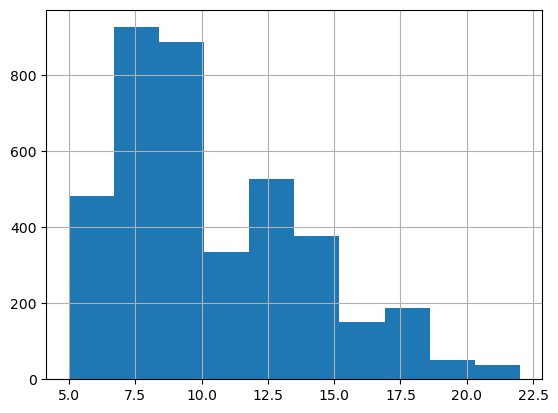

In [5]:
df_hbn_q['Age'].hist()

In [6]:
df_hbn_q.Age.describe()

count    3960.000000
mean       10.433586
std         3.574648
min         5.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        22.000000
Name: Age, dtype: float64

In [7]:
# min Age: 5, max Age: 22
# child: age < 14: 

In [8]:
df_hbn_q_child = df_hbn_q[(df_hbn_q['Age'] < 14) & (df_hbn_q['Age'] >= 8)]
df_hbn_q_child.Age.describe()

count    2238.000000
mean       10.079088
std         1.642501
min         8.000000
25%         9.000000
50%        10.000000
75%        11.000000
max        13.000000
Name: Age, dtype: float64

In [9]:
df_hbn_q_child.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2238 entries, 1 to 3959
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2238 non-null   object 
 1   Enrol_Season         2238 non-null   object 
 2   Age                  2238 non-null   int64  
 3   Sex                  2238 non-null   int64  
 4   CGAS-Season          1458 non-null   object 
 5   Physical-Season      1865 non-null   object 
 6   FE-Season            887 non-null    object 
 7   FGC-Season           1951 non-null   object 
 8   BIA-Season           1242 non-null   object 
 9   PAQ_A-Season         2 non-null      object 
 10  PAQ_C-Season         1634 non-null   object 
 11  PCIAT-Season         1566 non-null   object 
 12  SDS-Season           1611 non-null   object 
 13  PreInt_EduHx-Season  1995 non-null   object 
 14  sii                  1566 non-null   float64
dtypes: float64(1), int64(2), object(12)
memory 

In [10]:
df_hbn_q[df_hbn_q['Age'] >= 19].info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 9 to 3759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   88 non-null     object 
 1   Enrol_Season         88 non-null     object 
 2   Age                  88 non-null     int64  
 3   Sex                  88 non-null     int64  
 4   CGAS-Season          43 non-null     object 
 5   Physical-Season      63 non-null     object 
 6   FE-Season            0 non-null      object 
 7   FGC-Season           8 non-null      object 
 8   BIA-Season           41 non-null     object 
 9   PAQ_A-Season         0 non-null      object 
 10  PAQ_C-Season         0 non-null      object 
 11  PCIAT-Season         36 non-null     object 
 12  SDS-Season           22 non-null     object 
 13  PreInt_EduHx-Season  72 non-null     object 
 14  sii                  36 non-null     float64
dtypes: float64(1), int64(2), object(12)
memory us

In [11]:
import missingno as msno

<Axes: >

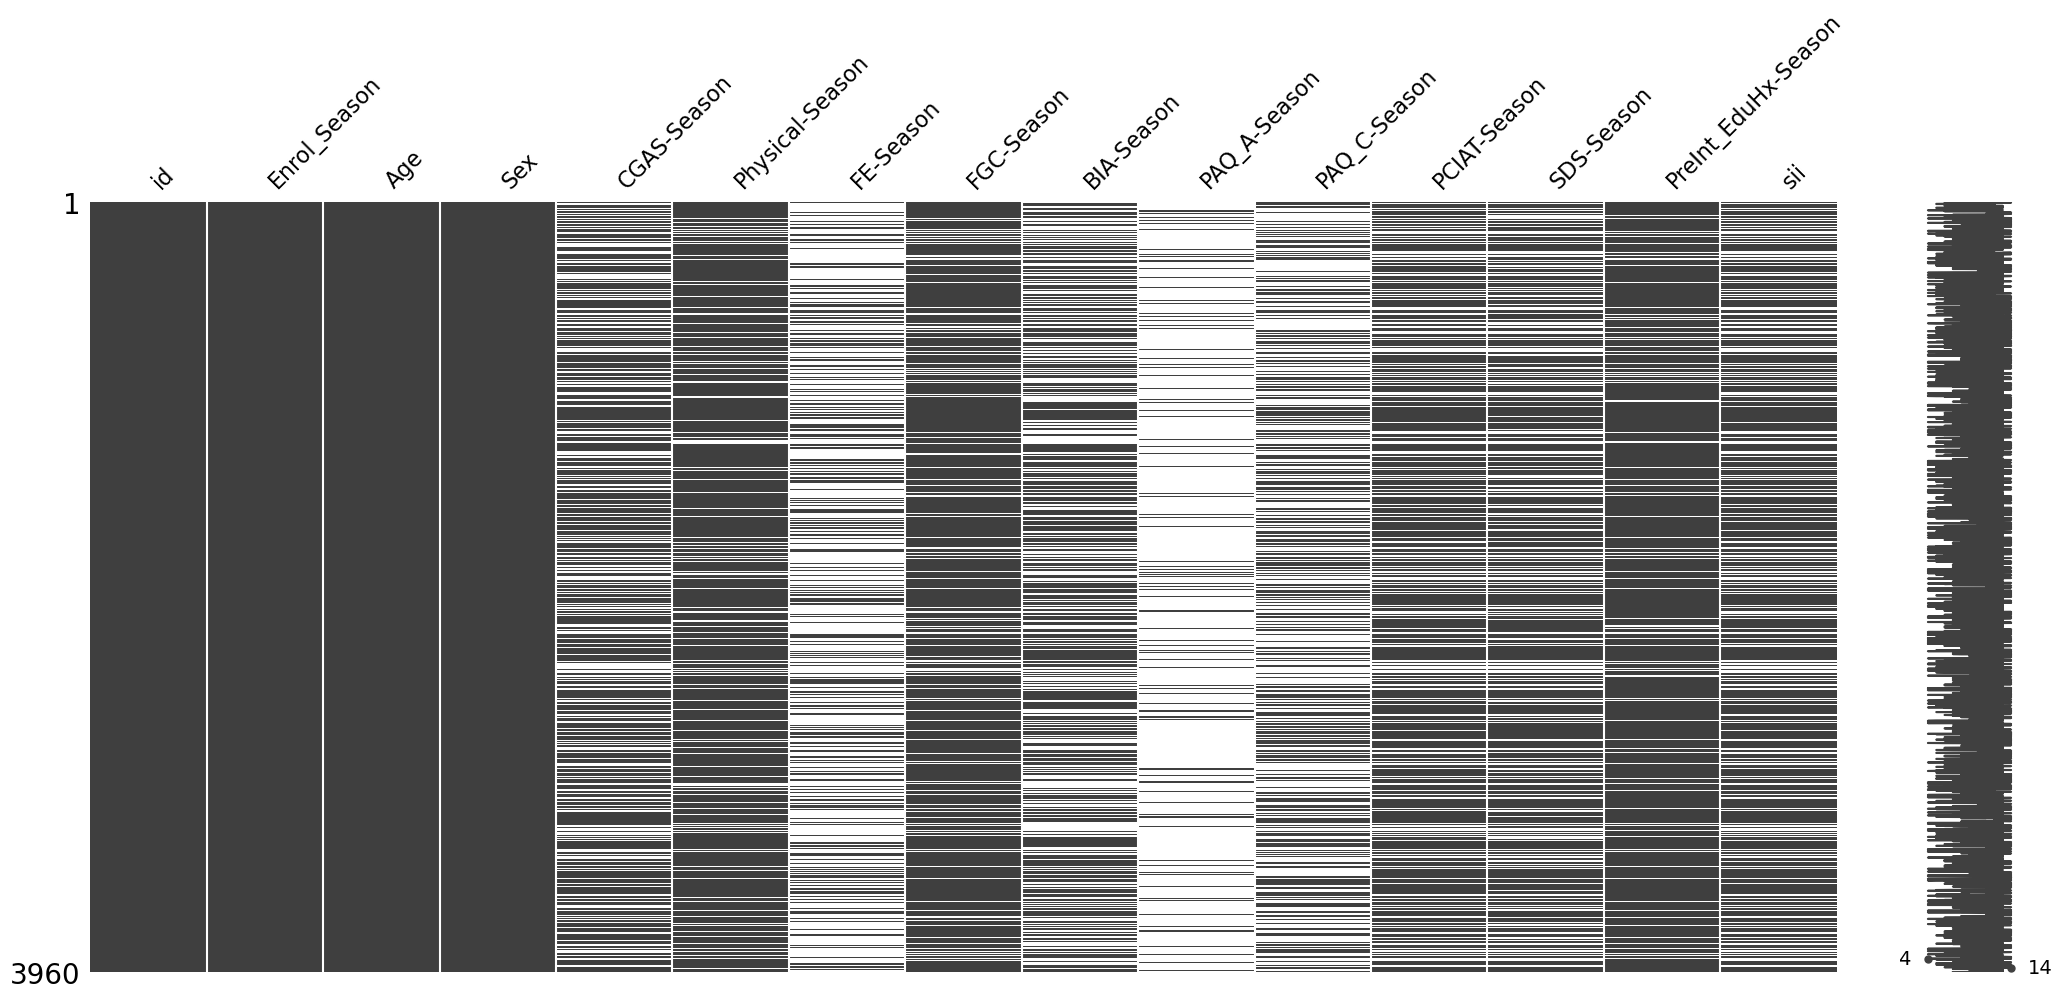

In [12]:
%matplotlib inline
msno.matrix(df_hbn_q)

<Axes: >

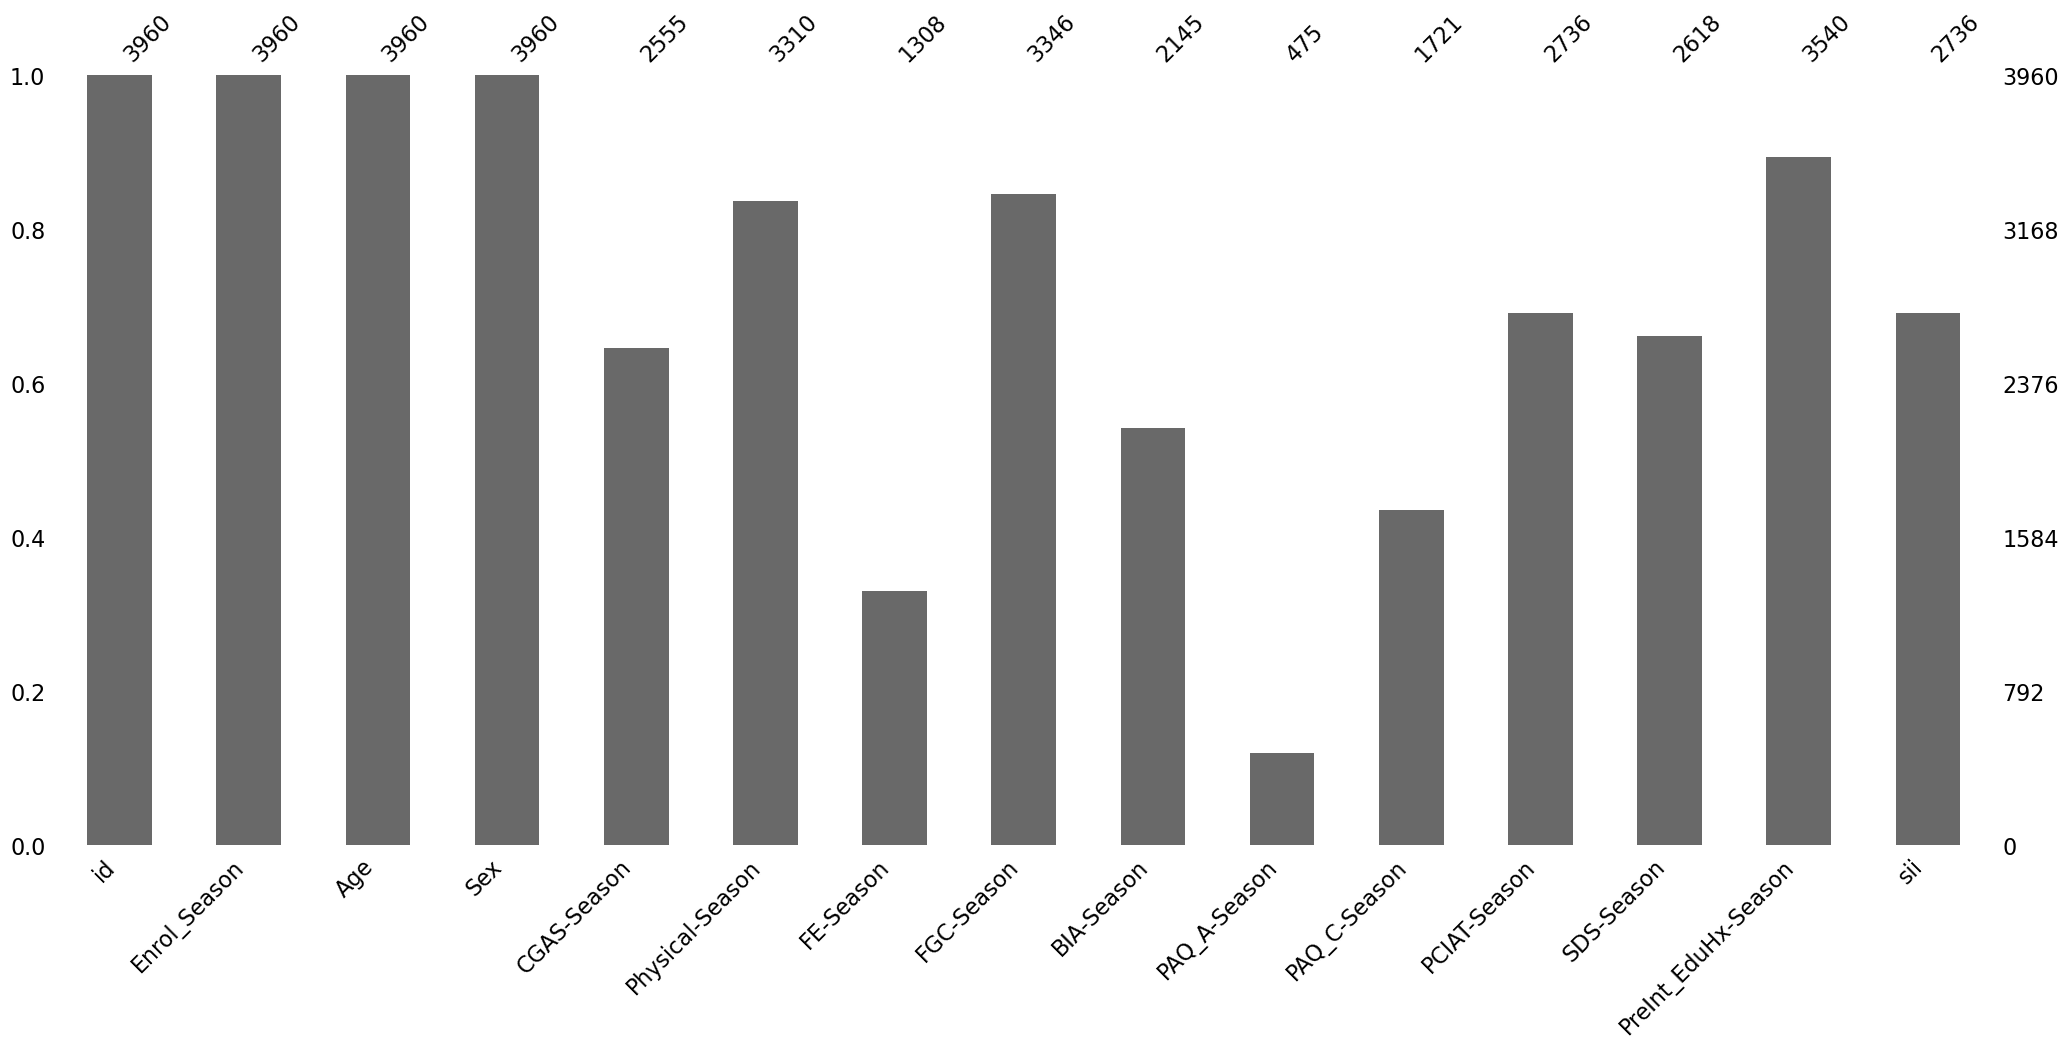

In [13]:
msno.bar(df_hbn_q)

In [14]:
df_hbn_q[df_hbn_q['PAQ_A-Season'].notna()].Age.describe()

count    475.000000
mean      15.673684
std        1.183948
min       13.000000
25%       15.000000
50%       16.000000
75%       17.000000
max       18.000000
Name: Age, dtype: float64

In [15]:
df_hbn_q[df_hbn_q['PAQ_C-Season'].notna()].Age.describe()

count    1721.000000
mean       10.455549
std         1.735212
min         7.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        17.000000
Name: Age, dtype: float64

<Axes: >

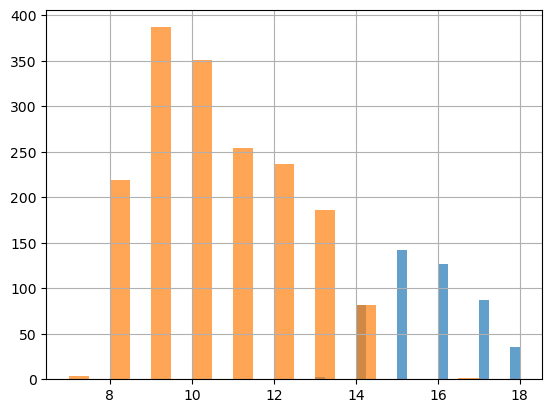

In [16]:
df_hbn_q[df_hbn_q['PAQ_A-Season'].notna()].Age.hist(bins=20, alpha=0.7)
df_hbn_q[df_hbn_q['PAQ_C-Season'].notna()].Age.hist(bins=20, alpha=0.7)


In [17]:
df_hbn_q[df_hbn_q['PAQ_C-Season'].notna()]

,id,Enrol_Season,Age,Sex,CGAS-Season,Physical-Season,FE-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,PCIAT-Season,SDS-Season,PreInt_EduHx-Season,sii
1,000fd460,Summer,9,0,NaN,Fall,NaN,Fall,Winter,NaN,Fall,Fall,Fall,Summer,0.0
2,00105258,Summer,10,1,Fall,Fall,Fall,Fall,NaN,NaN,Summer,Fall,Fall,Summer,0.0
3,00115b9f,Winter,9,0,Fall,Summer,Summer,Summer,Summer,NaN,Winter,Summer,Summer,Winter,1.0
5,001f3379,Spring,13,1,Winter,Summer,NaN,Summer,Summer,NaN,Spring,Summer,Summer,Spring,1.0
6,0038ba98,Fall,10,0,NaN,Fall,NaN,Fall,Fall,NaN,Winter,Winter,Winter,Fall,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,Fall,NaN,Fall,Fall,NaN,Fall,Fall,Fall,Fall,0.0
3955,ff8a2de4,Fall,13,0,Spring,Fall,NaN,Fall,Fall,NaN,Winter,Winter,Winter,Fall,1.0
3956,ffa9794a,Winter,10,0,NaN,Spring,NaN,Spring,Spring,NaN,Winter,NaN,NaN,Winter,NaN
3957,ffcd4dbd,Fall,11,0,Spring,Winter,NaN,Winter,Winter,NaN,Winter,Winter,Winter,Fall,1.0


<Axes: >

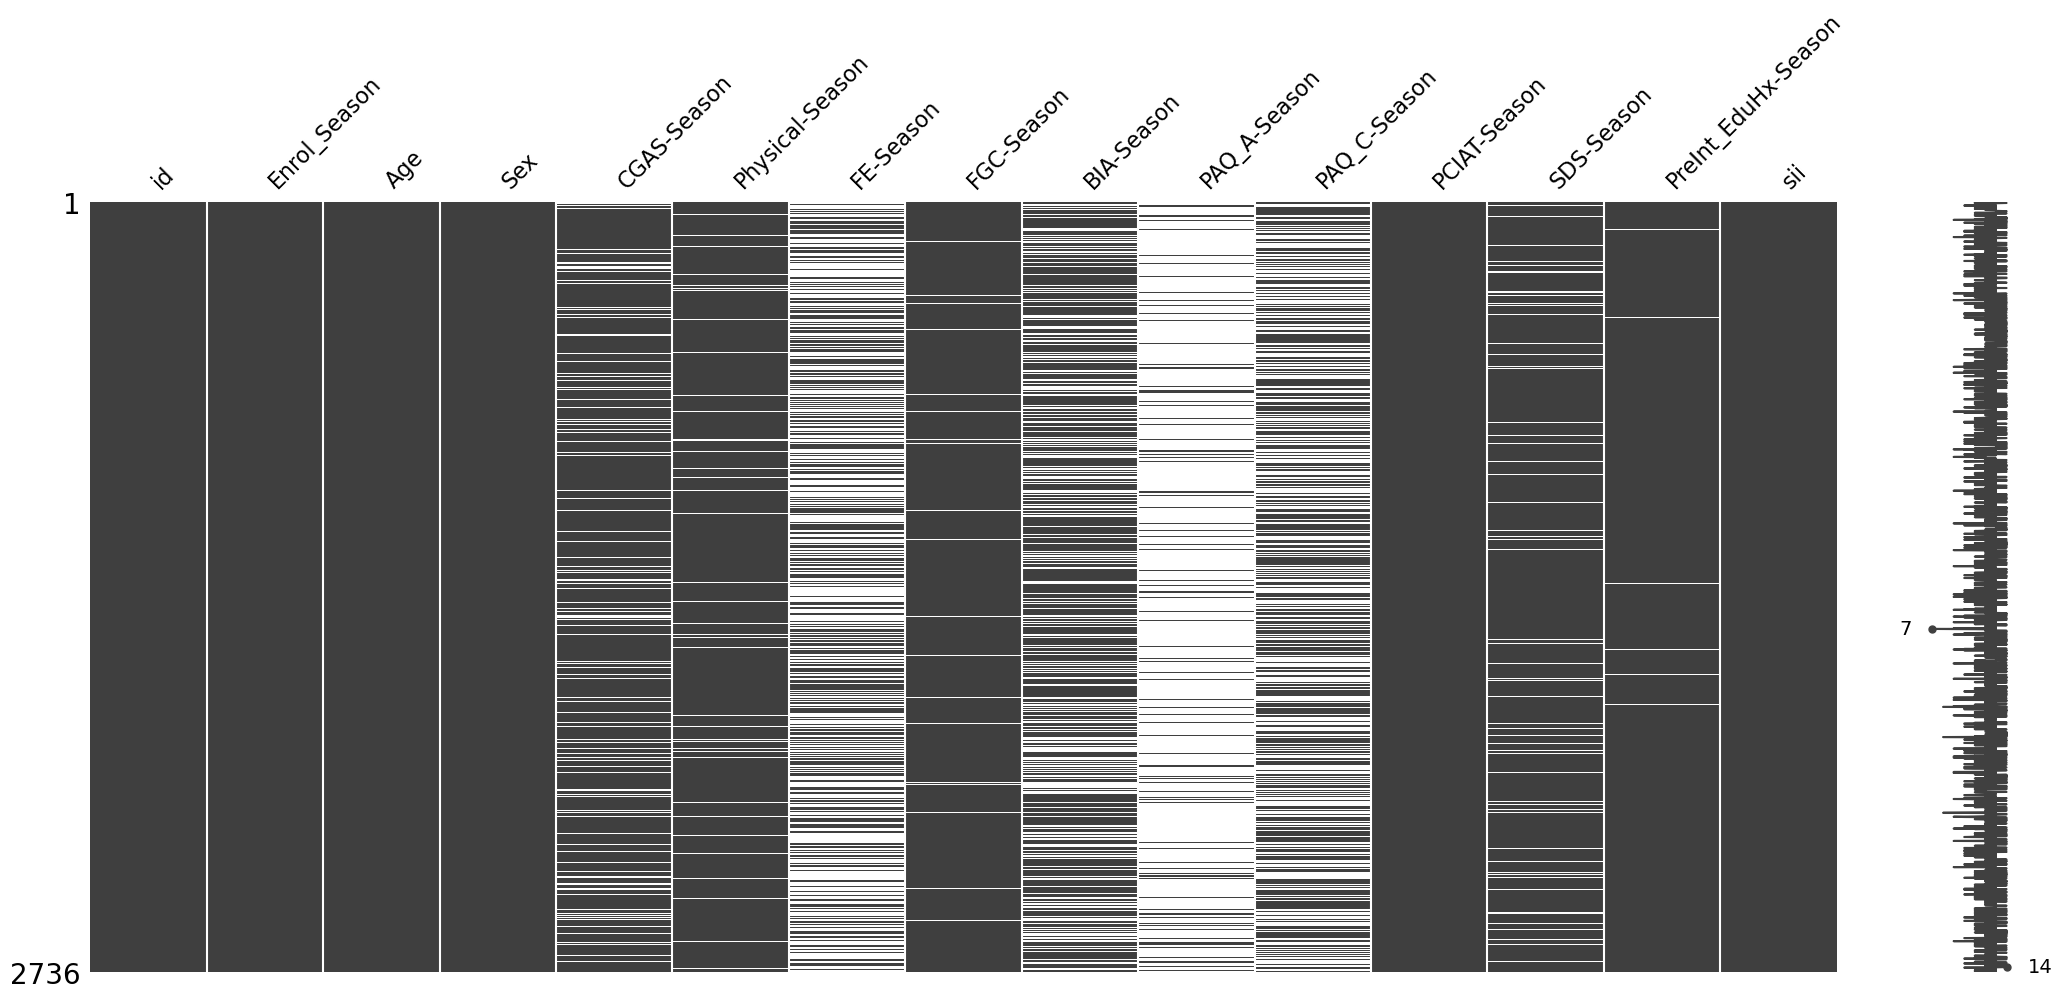

In [18]:
msno.matrix(df_hbn_q.dropna(subset=['sii']))

In [19]:
df_sii_notna = df_hbn_q.dropna(subset=['sii'])

df_sii_notna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2736 non-null   object 
 1   Enrol_Season         2736 non-null   object 
 2   Age                  2736 non-null   int64  
 3   Sex                  2736 non-null   int64  
 4   CGAS-Season          2342 non-null   object 
 5   Physical-Season      2595 non-null   object 
 6   FE-Season            1260 non-null   object 
 7   FGC-Season           2647 non-null   object 
 8   BIA-Season           1844 non-null   object 
 9   PAQ_A-Season         363 non-null    object 
 10  PAQ_C-Season         1440 non-null   object 
 11  PCIAT-Season         2736 non-null   object 
 12  SDS-Season           2527 non-null   object 
 13  PreInt_EduHx-Season  2719 non-null   object 
 14  sii                  2736 non-null   float64
dtypes: float64(1), int64(2), object(12)
memory 

In [20]:
df_sii_notna[df_sii_notna['PAQ_C-Season'].notna()].Age.describe()

count    1440.000000
mean       10.434028
std         1.741800
min         7.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        14.000000
Name: Age, dtype: float64

In [21]:
df_sii_notna[df_sii_notna['PAQ_A-Season'].notna()].Age.describe()

count    363.000000
mean      15.691460
std        1.179291
min       13.000000
25%       15.000000
50%       16.000000
75%       17.000000
max       18.000000
Name: Age, dtype: float64

<Axes: >

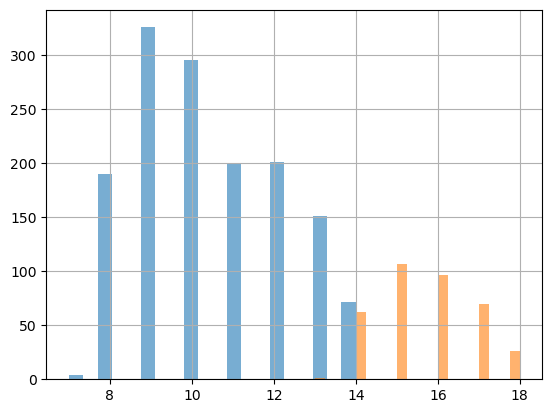

In [22]:
df_sii_notna[df_sii_notna['PAQ_C-Season'].notna()].Age.hist(bins=20, alpha=0.6)
df_sii_notna[df_sii_notna['PAQ_A-Season'].notna()].Age.hist(bins=20, alpha=0.6)

<Axes: >

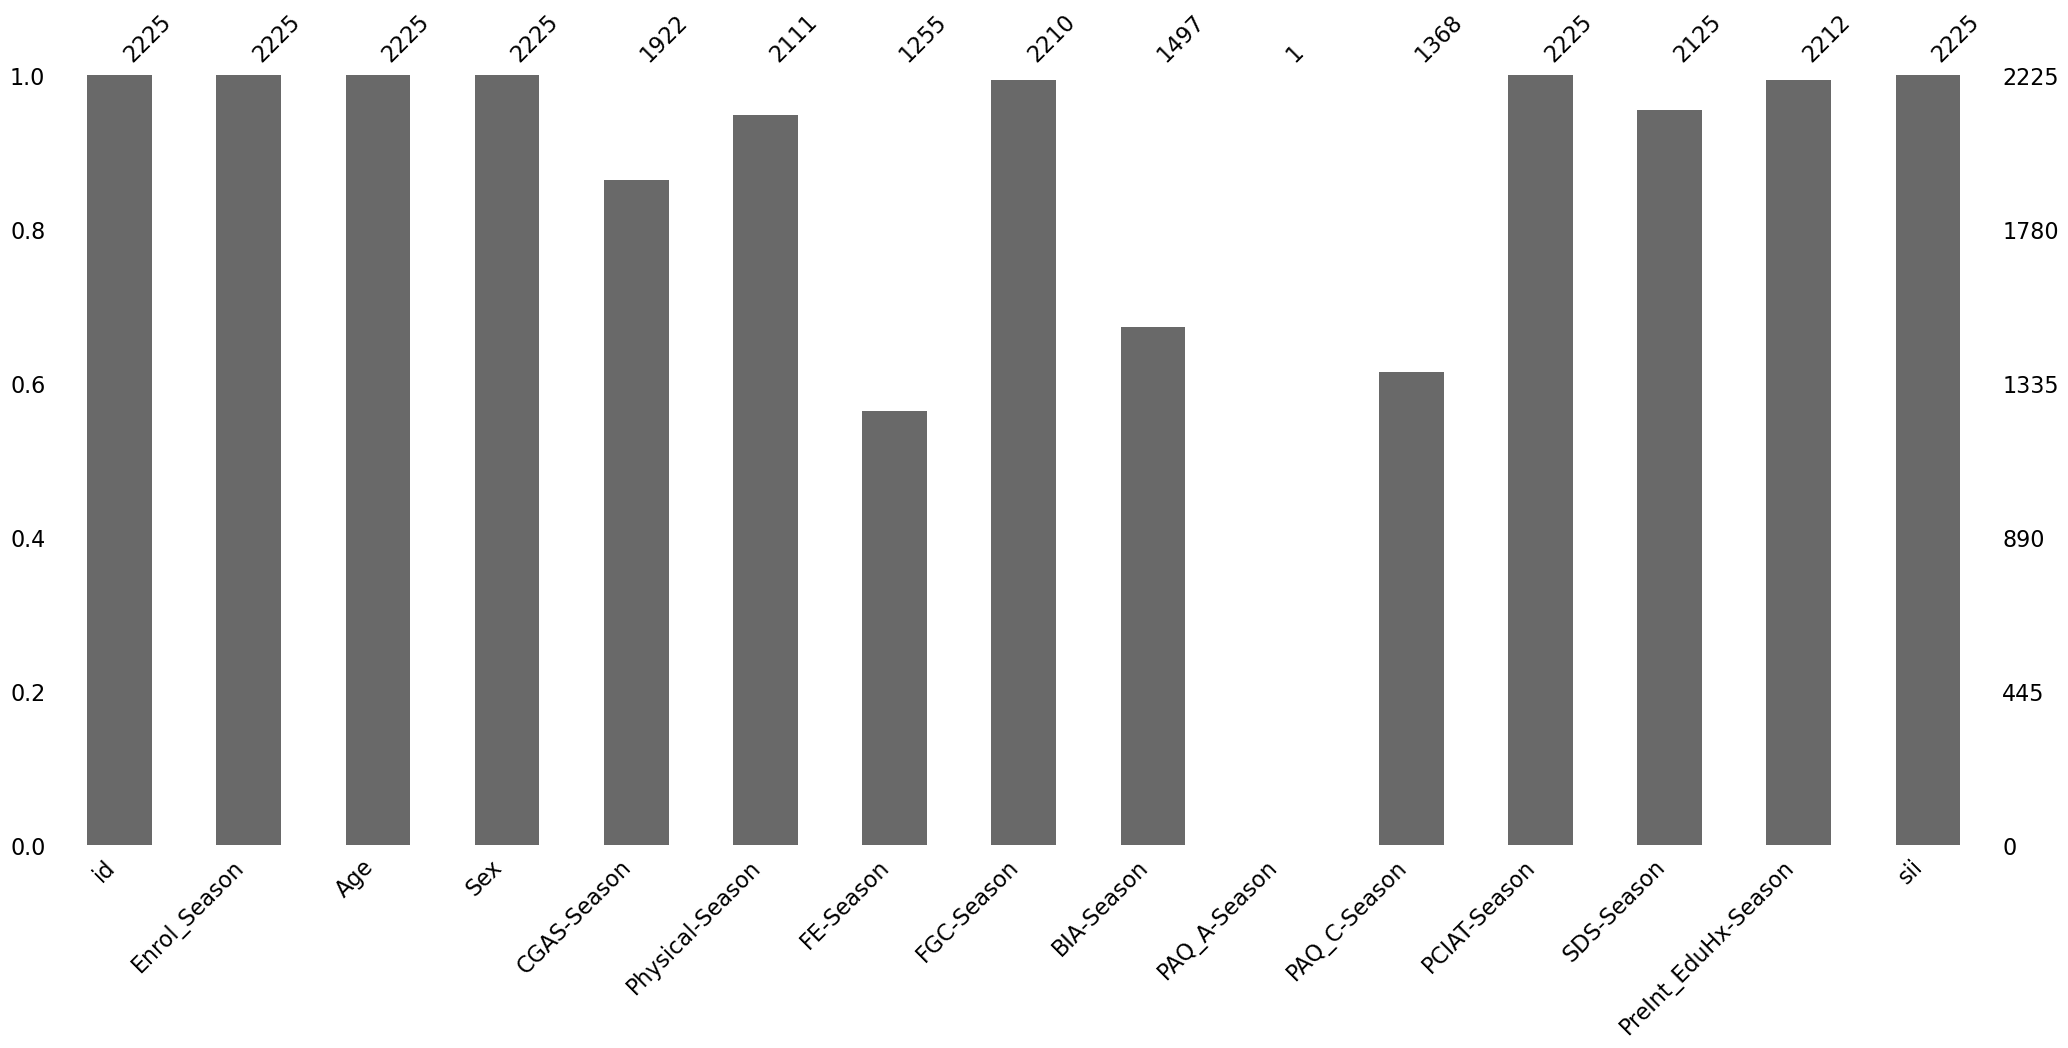

In [23]:
df_sii_notan_lt14 = df_sii_notna[df_sii_notna['Age'] < 14]
msno.bar(df_sii_notan_lt14)

In [24]:
df_sii_notan_lt14.head()

,id,Enrol_Season,Age,Sex,CGAS-Season,Physical-Season,FE-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,PCIAT-Season,SDS-Season,PreInt_EduHx-Season,sii
0,00008ff9,Fall,5,0,Winter,Fall,NaN,Fall,Fall,NaN,NaN,Fall,NaN,Fall,2.0
1,000fd460,Summer,9,0,NaN,Fall,NaN,Fall,Winter,NaN,Fall,Fall,Fall,Summer,0.0
2,00105258,Summer,10,1,Fall,Fall,Fall,Fall,NaN,NaN,Summer,Fall,Fall,Summer,0.0
3,00115b9f,Winter,9,0,Fall,Summer,Summer,Summer,Summer,NaN,Winter,Summer,Summer,Winter,1.0
5,001f3379,Spring,13,1,Winter,Summer,NaN,Summer,Summer,NaN,Spring,Summer,Summer,Spring,1.0


<Axes: >

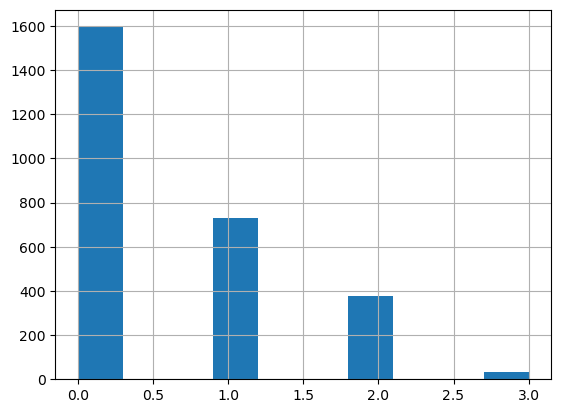

In [25]:
df_hbn.sii.hist()

In [26]:
df_hbn.sii.describe()

count    2736.000000
mean        0.580409
std         0.771122
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: sii, dtype: float64

In [27]:
df_hbn.sii.unique()

array([ 2.,  0.,  1., nan,  3.])

In [28]:
df_hbn_sii = df_hbn.copy()
df_hbn_sii['sii'] = df_hbn_sii['sii'].fillna(-1)

plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

/var/folders/ff/4p_yj_510c95r3qx09wm60bh0000gn/T/ipykernel_13944/667936559.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_hbn_sii, x='sii', palette='viridis')


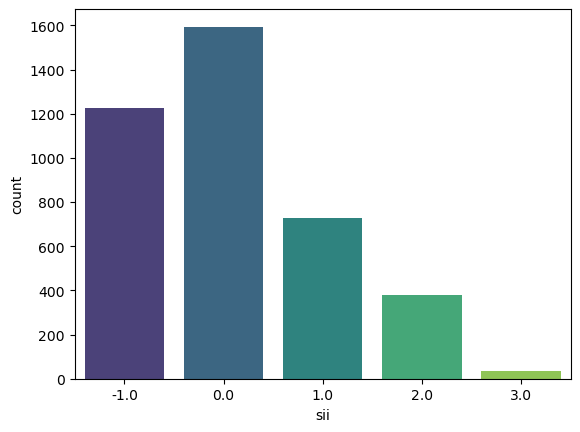

In [29]:
sns.countplot(data=df_hbn_sii, x='sii', palette='viridis')
plt.show()


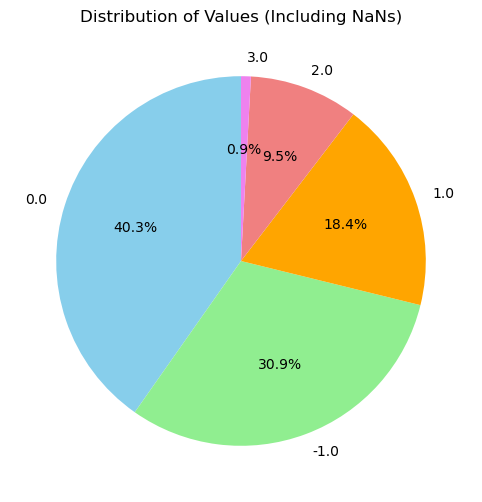

In [30]:


value_counts = df_hbn_sii['sii'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'lightcoral', 'violet'])

# Add a title
plt.title('Distribution of Values (Including NaNs)')

# Show the plot
plt.show()

Missing % for each column:
 PAQ_A-PAQ_A_Total    88.005051
PAQ_A-Season         88.005051
FE-Time_Mins         81.313131
FE-Time_Sec          81.313131
FE-Max_Stage         81.237374
                       ...    
id                    0.000000
Sex                   0.000000
Age                   0.000000
Enrol_Season          0.000000
Unnamed: 0            0.000000
Length: 83, dtype: float64


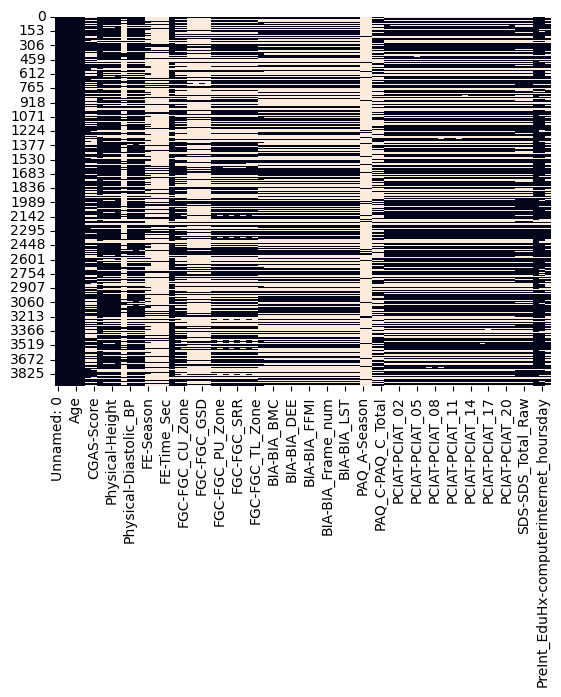

In [31]:
missing_perc = df_hbn.isnull().mean() * 100
print("Missing % for each column:\n", missing_perc.sort_values(ascending=False))

# Visual check of missingness
sns.heatmap(df_hbn.isnull(), cbar=False)
plt.show()